In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, html, dash_table, dcc, Input, Output, callback
import dash_daq as daq


In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [3]:
df = pd.read_csv("scores.csv")

In [2]:
df = pd.read_csv("finaltestscores.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [5]:
df = df.dropna()

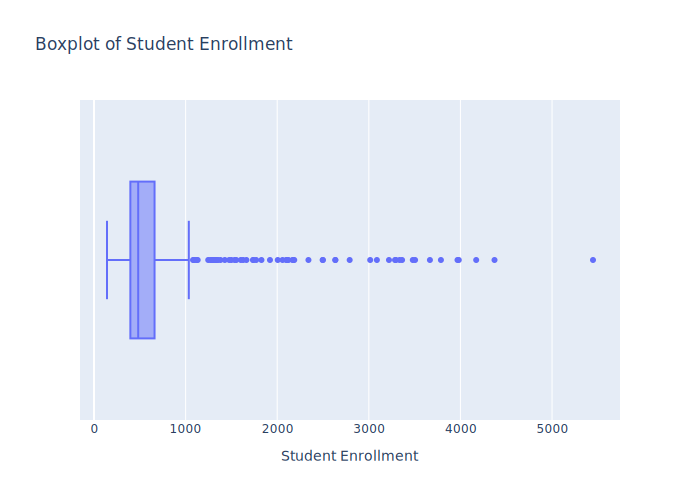

In [6]:
fig = px.box(df,  x = "Student Enrollment", title = "Boxplot of Student Enrollment")
fig.show()

In [7]:
def school_size(row):
    if row["Student Enrollment"] <= 500:
        return "0-500"
    elif row["Student Enrollment"] >= 1000:
        return "1000+"
    else:
        return "501-999"
df["school_size"] = df.apply (lambda row: school_size(row), axis = 1)

In [8]:
df["school_size"].value_counts()

school_size
0-500      203
501-999    110
1000+       61
Name: count, dtype: int64

In [9]:
columns = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]

for column in columns:
    df[column] = df[column].str.rstrip('%').astype('float') 

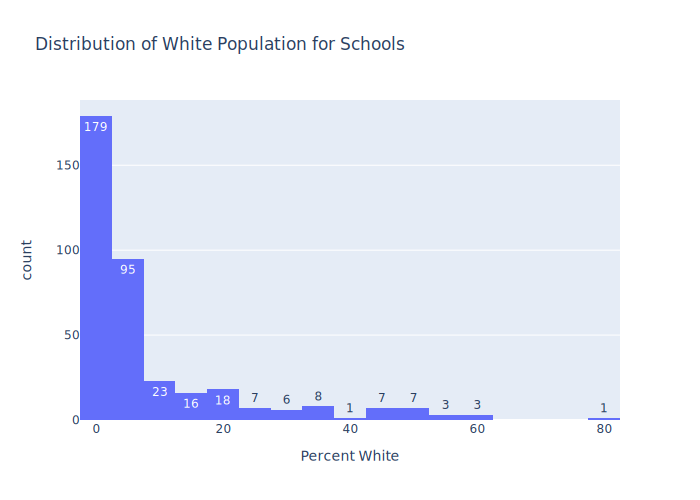

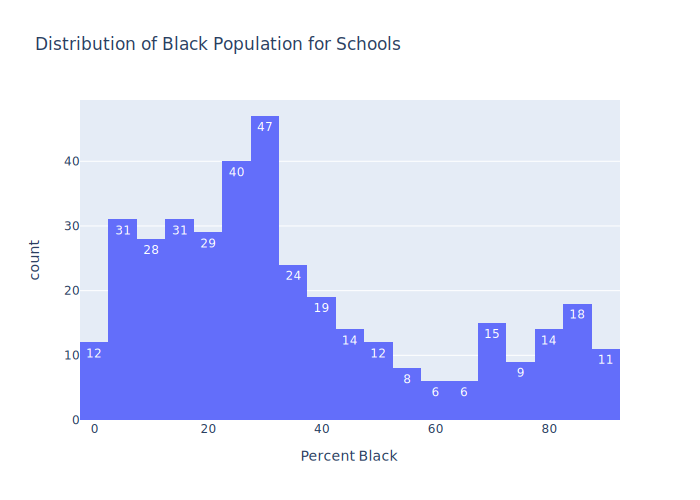

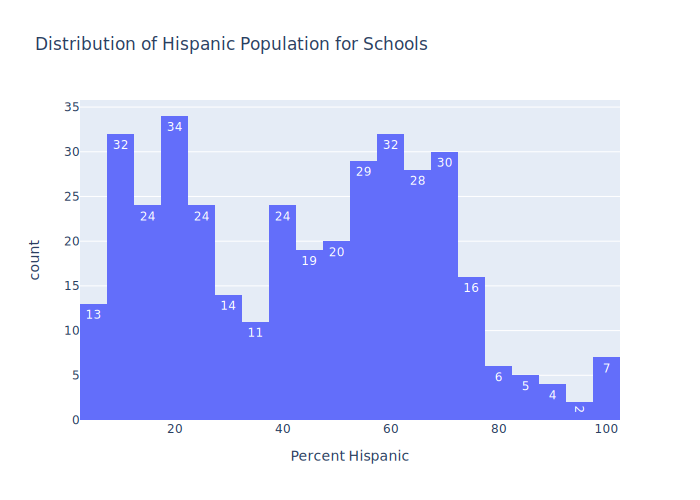

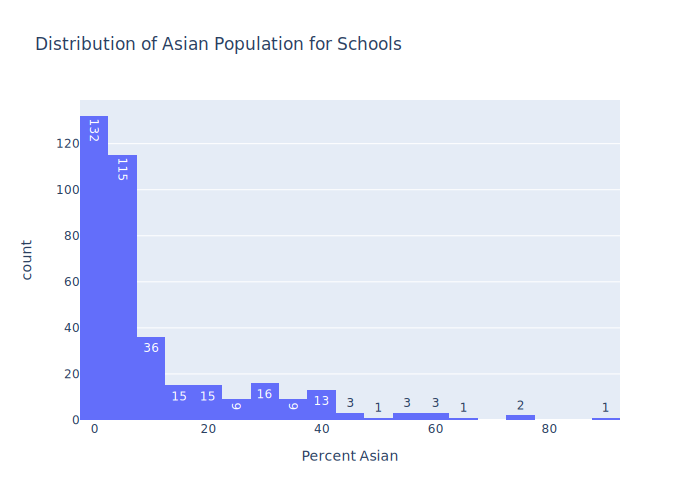

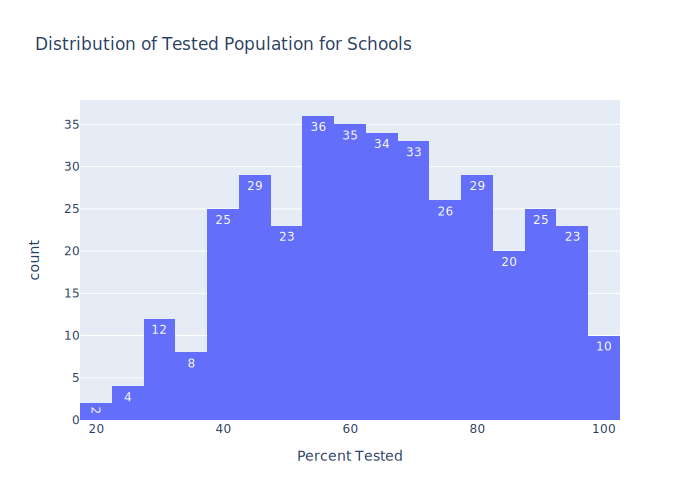

In [10]:
columns = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]

for column in columns:
    fig = px.histogram(df, x = column, title = "Distribution of " + column[8:] + " Population for Schools", text_auto = True)
    fig.show()

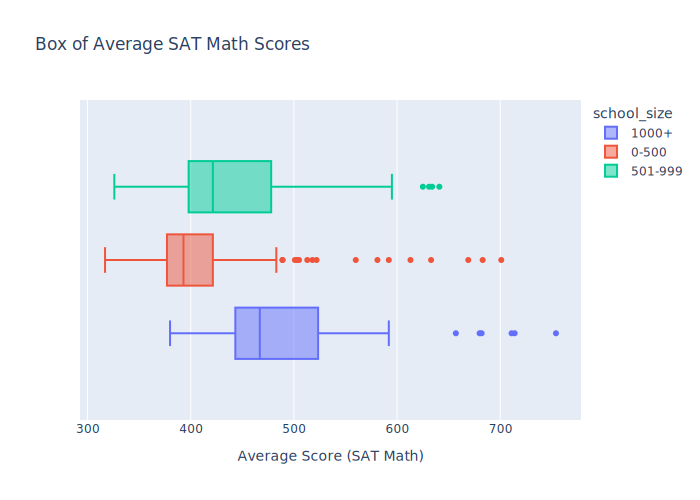

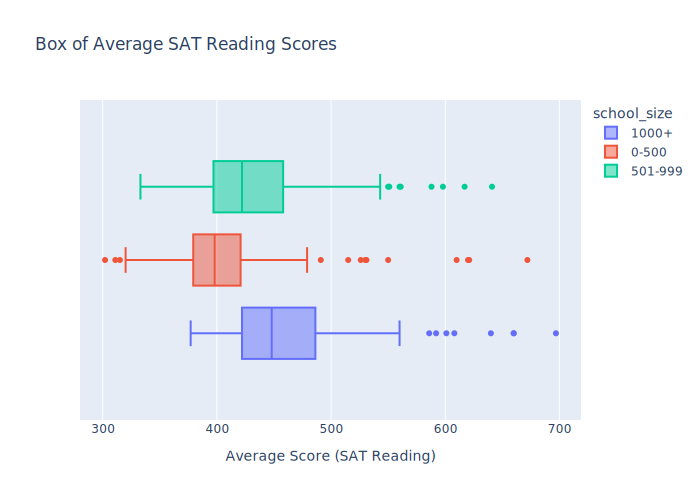

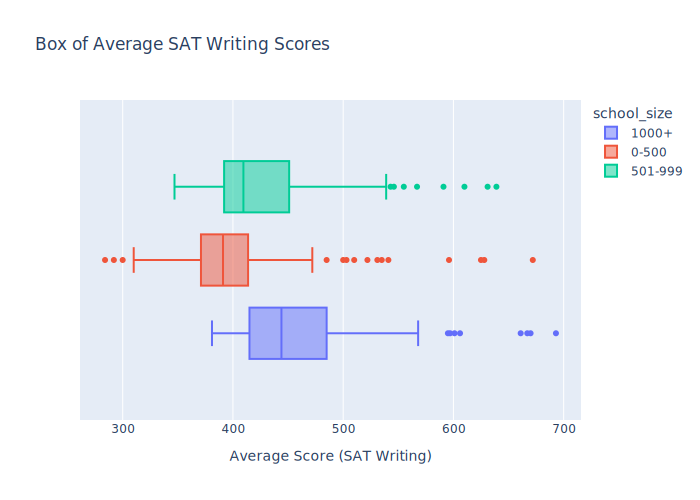

In [11]:
columns = ["Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"]
for column in columns:
    fig = px.box(df, x = column, title = "Box of Average " + column[15:-1] + " Scores", color = "school_size")
    fig.show()

In [12]:
df["Average SAT Score"] =(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])

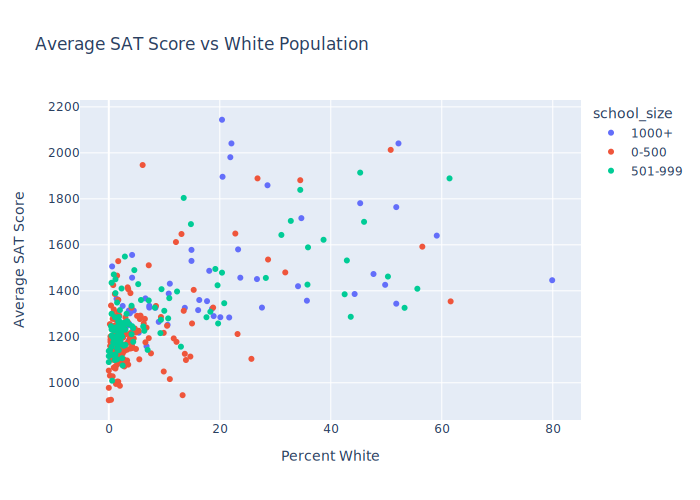

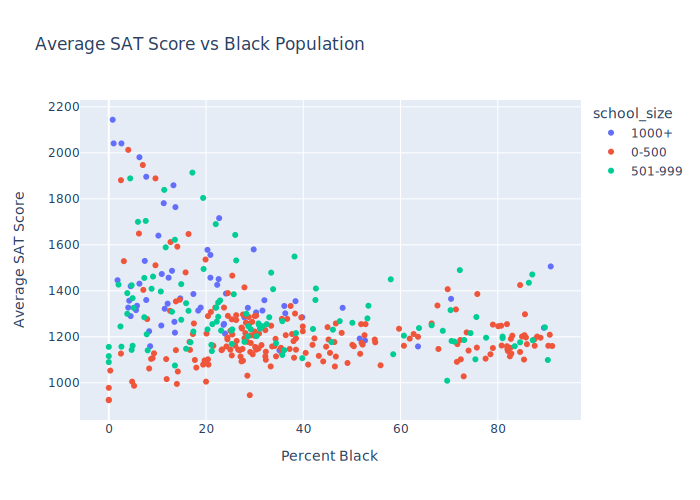

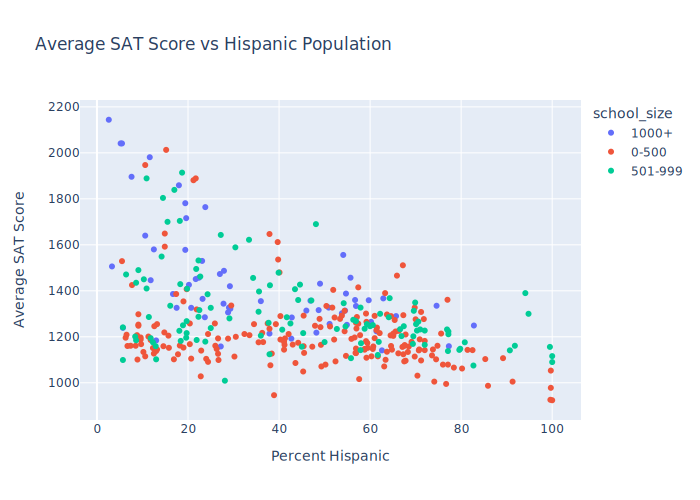

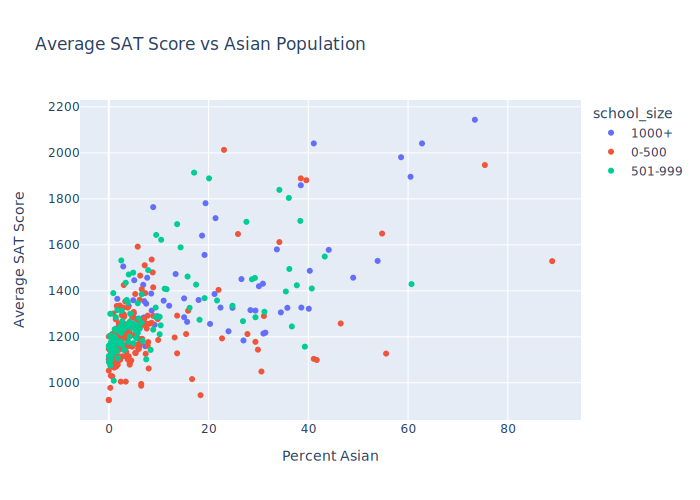

In [13]:
columns = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]
for column in columns:
    fig = px.scatter(df,  x = column, y = "Average SAT Score", title = "Average SAT Score vs " + column[8:] + " Population", color = "school_size")
    fig.show()

In [14]:
df_corr = df[["Student Enrollment", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Average SAT Score"]]
df_corr = df_corr.corr()

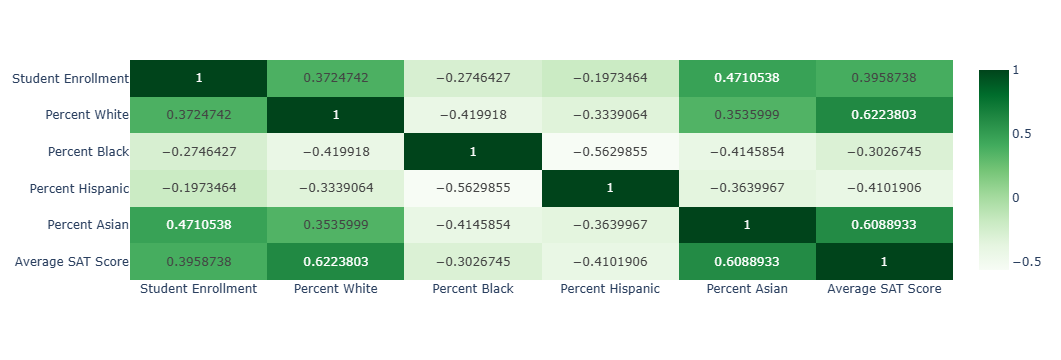

In [18]:
fig = px.imshow(df_corr, text_auto = True, aspect = "auto", color_continuous_scale = 'greens')
fig.show()

In [64]:
def three_plot(school_name):
        test_mean = int(df["Average SAT Score"].mean())
        tested_mean = int(df["Percent Tested"].mean())
        test_max = int(df["Average SAT Score"].max())
        df_school = df[df["School Name"] == school_name]
        trace1 = go.Indicator(mode="gauge+number+delta",   
                          value= int(df_school["Average SAT Score"]), 
                          delta = {'reference': test_mean}, 
                          gauge = {'axis': {'range': [0, 2400]}}, 
                          domain={'row' : 1, 'column' : 1},
                          title={'text': "Average SAT Score "})
        trace2 = go.Indicator(mode="gauge+number+delta",   
                          value=float(df_school["Percent Tested"]), 
                          delta = {'reference': tested_mean}, 
                          gauge = {'axis': {'range': [0, 100]}}, 
                          domain={'row' : 1, 'column' : 2},
                          title={'text': "Percent Tested"})
        fig = make_subplots(rows=2,cols=2, specs=[[{'type': 'indicator'}, {'type' : 'indicator'}], [{'type' : 'bar', 'colspan' : 2}, None]])
        fig.add_trace(go.Bar(name='White Percentage', x=df_school["Percent White"], y=df_school["School Name"], text= df_school["Percent White"], orientation = "h"),
                  row = 2, col =1)
                  
        fig.add_trace(go.Bar(name='Black Percentage', x=df_school["Percent Black"], y=df_school["School Name"], text= df_school["Percent Black"], orientation = "h"),
                   row = 2, col =1)
        fig.add_trace(go.Bar(name='Hispanic Percentage', x=df_school["Percent Hispanic"], y=df_school["School Name"], text= df_school["Percent Hispanic"], orientation = "h"),
                  row = 2, col = 1)
        fig.add_trace(go.Bar(name='Asian Percentage', x=df_school["Percent Asian"], y=df_school["School Name"], text= df_school["Percent Asian"], orientation = "h"),
                  row = 2, col = 1)
                   
        fig.append_trace(trace1, row=1, col=1)
        fig.append_trace(trace2, row=1, col=2)
        fig.update_layout(height = 600, title_text = school_name, barmode = 'stack')
        fig.show()

C:\Users\adaml\AppData\Local\Temp\ipykernel_12384\2996038296.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\adaml\AppData\Local\Temp\ipykernel_12384\2996038296.py:13: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



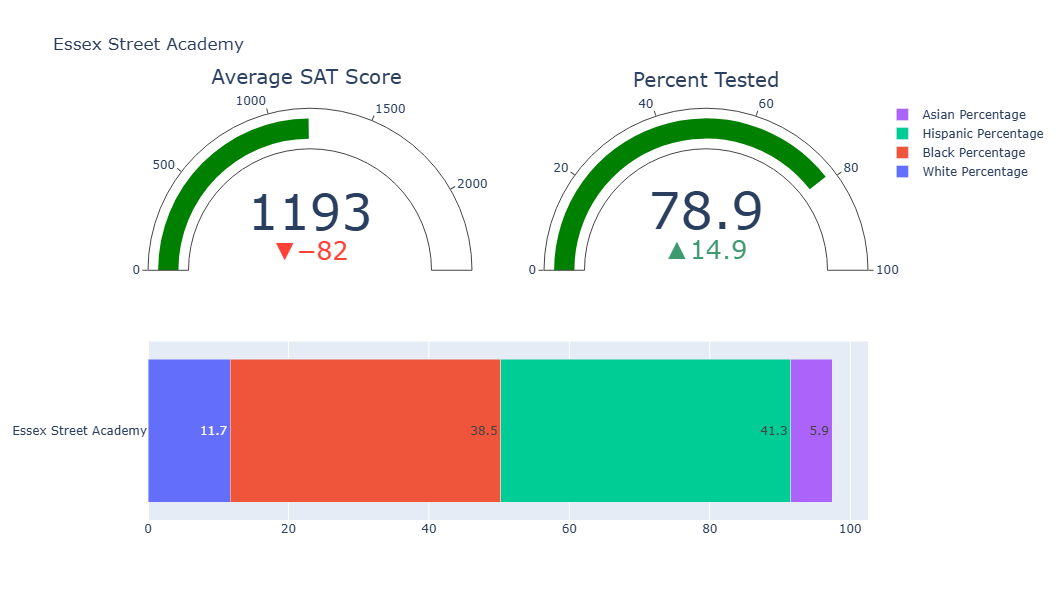

In [65]:
three_plot("Essex Street Academy")